<a href="https://colab.research.google.com/github/SaraBCoutinho/Pesquisa_2/blob/main/LIAR_2_atual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ajustes finais: acrescentar cnn, bert, pre processamento se der. Ver o erro no fit do stacking, rever a tabela do oracle que precisa preencher todos os pontos, rever importaçao do método umap. 

## PARTE I 

### Imports

In [ ]:
from numpy import load
#--Data
!pip install datasets
from datasets import load_dataset
import pandas as pd
#--Data analysis 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import STOPWORDS, WordCloud
!pip install ftfy
# import libraries
import ftfy
import nltk
import json
import re
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer

from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk import pos_tag
#nltk.download('stopwords')

from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier # need to import xboost calssifer

warnings.filterwarnings('ignore')
np.random.seed(0)

import nltk
nltk.download('stopwords')

# stop words list set to english
stopwords_list = stopwords.words('english') # stop word list

""" Regular expression for cleaning the statements"""
import re

hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
extras_re = re.compile("[.;:!\'?,\"()\[\]]")
#apos_re = "\'[a-z]*"
#leftover_re = "\S+"

from unicodedata import normalize

!pip install zeugma
!pip install preprocessing
!pip install function

from zeugma.embeddings import EmbeddingTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocessing import *
from function import *

#!pip install itertools
import itertools
!pip install bert_embedding
from bert_embedding import BertEmbedding

#classifiers
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf#--cnn
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec

from sklearn.neighbors import KNeighborsClassifier

     |████████████████████████████████| 312 kB 11.3 MB/s 
     |████████████████████████████████| 133 kB 10.7 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 243 kB 43.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 42.0 MB/s 
     |████████████████████████████████| 271 kB 33.5 MB/s 
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=370b128839ebaf9f2cfaced82820d777808b80d14eb10e76be545283700dafff
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8823 sha256=b26e4e4121dbc

  Created wheel for function: filename=function-1.2.0-py3-none-any.whl size=1463 sha256=1b83ad6d3354703e97e9da037e72b9f83b74f24a4f63abccafc0556fc584b40c
  Stored in directory: /root/.cache/pip/wheels/97/ac/86/0db3a8b76385994e22ec07808657e3584de609026808a32ca6
Successfully built function
     |████████████████████████████████| 209 kB 43.1 MB/s 
     |████████████████████████████████| 13.8 MB 54.9 MB/s 
     |████████████████████████████████| 29.6 MB 71.7 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=5c8eb7d74337cfafe068c2b1edc7fc538955af700f65f75d6c0766f4e17001d4
  Stored in directory: /root/.cache/pip/wheels/a6/41/8f/45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstall

In [ ]:
!pip install transformers
import transformers
from transformers import pipeline, AutoTokenizer

     |████████████████████████████████| 3.5 MB 27.7 MB/s 
     |████████████████████████████████| 6.8 MB 50.1 MB/s 
     |████████████████████████████████| 895 kB 71.9 MB/s 
     |████████████████████████████████| 15.7 MB 44.2 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
mxnet 1.4.0 requires numpy<1.15.0,>=1.8.2, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1

### Data 

In [ ]:
#dataset
dataset = load_dataset('liar')

#data
train=pd.DataFrame(dataset['train'])
test=pd.DataFrame(dataset['test'])
val=pd.DataFrame(dataset['validation'])

#0 fake 1 true 
Original_labels={5:1, 4:1, 3:1, 1:0,2:0,0:0}
train['label'] = train['label'].map(Original_labels)
test['label'] = test['label'].map(Original_labels)
val['label'] = val['label'].map(Original_labels)

def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = extras_re.sub("",p_text)
    p_text = url_re.sub("[url]",p_text) #removing url
    p_text = ftfy.fix_text(p_text)
    return p_text.lower()

train['statement']=train['statement'].map(preprocess)
val['statement']=val['statement'].map(preprocess)
test['statement']=test['statement'].map(preprocess)

# specifying features and labels
X_train= train['statement']
X_val=val['statement']
X_test=test['statement']
y_train=train['label']
y_val=val['label']
y_test=test['label']


Downloading:   0%|          | 0.00/2.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset liar downloaded and prepared to /root/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

#### Métricas 

In [ ]:
# function for results of cross-validation
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))


# fucntion for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    
# function for displaying confusion matrix
def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="BuPu", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

# function for displaying confusion matrix in percentage terms
def confusion_matrix_percent_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    percents = cmdf.div(cmdf.sum(axis=1), axis=0)*100
    dims = (10, 10)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(percents, annot=True, cmap="PiYG", center=0, vmin=0, vmax=100)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    

### Embeddings 

In [ ]:
#Features
w2v = EmbeddingTransformer('word2vec')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
glove = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
fasttext = EmbeddingTransformer('fasttext')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
cv = CountVectorizer(analyzer='word', lowercase=True, stop_words='english')
tfidf =  TfidfVectorizer(analyzer='word', lowercase=True, use_idf=True, stop_words='english')


In [ ]:
## bert tokenizer
#tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
## bert model
#nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
# your approach
#feature_extraction = pipeline('feature-extraction', model=nlp, tokenizer=tokenizer)

In [ ]:
w2v.fit_transform(X_train)

array([[-0.01729499,  0.00689697,  0.03826226, ...,  0.07511393,
         0.07332357,  0.03662109],
       [ 0.02647182,  0.06865647,  0.0250978 , ...,  0.01544625,
         0.05013312,  0.04577056],
       [ 0.00924144,  0.0617034 ,  0.02989197, ..., -0.07788445,
        -0.03355497,  0.03922047],
       ...,
       [ 0.01652344, -0.02819092,  0.02696732, ..., -0.04172119,
         0.00268311, -0.03214035],
       [ 0.00847626,  0.02862549,  0.06853061, ..., -0.06285265,
         0.07046848,  0.00950792],
       [ 0.01804443,  0.06629883,  0.01486023, ..., -0.05673584,
         0.00993408,  0.01897949]], dtype=float32)

In [ ]:
glove.fit_transform(X_train)

array([[ 0.0213763 ,  0.43541342, -0.43846807, ..., -0.329463  ,
        -0.8924302 , -0.586528  ],
       [-0.13099054,  0.47419348,  0.09988022, ...,  0.18917918,
        -0.17913939, -0.22327583],
       [-0.11256687,  0.38914734, -0.21627848, ..., -0.20916475,
        -0.60334635, -0.50307614],
       ...,
       [-0.00714505,  0.367781  , -0.24965903, ..., -0.08291255,
        -0.38867006, -0.32119343],
       [-0.22807427,  0.3554912 , -0.25729   , ..., -0.04593637,
        -0.5202474 , -0.39060327],
       [-0.09578022,  0.44947752, -0.24495624, ..., -0.25850907,
        -0.26667693, -0.37061915]], dtype=float32)

In [ ]:
fasttext.fit_transform(X_train)

array([[ 0.0217688 , -0.00677315,  0.00118912, ..., -0.01462439,
         0.00905827,  0.01011661],
       [-0.0019991 ,  0.01173383,  0.01505312, ..., -0.01890184,
         0.00784882,  0.00472874],
       [ 0.0059891 ,  0.01893114, -0.02191068, ..., -0.01153236,
        -0.00867613, -0.00050756],
       ...,
       [ 0.01462727, -0.01189874,  0.00174642, ..., -0.01087125,
        -0.01697693, -0.01136008],
       [ 0.01827936,  0.00662829, -0.00269388, ..., -0.0198031 ,
        -0.00600116,  0.00738895],
       [-0.00213575, -0.01048544,  0.02879171, ..., -0.00014671,
        -0.01987064, -0.00821233]], dtype=float32)

In [ ]:
cv.fit_transform(X_train)
tfidf.fit_transform(X_train)

<10269x12199 sparse matrix of type '<class 'numpy.float64'>'
	with 101010 stored elements in Compressed Sparse Row format>

## PARTE II

### Classificadores

In [ ]:
!mkdir Data
!mkdir Data/liar
# load data
train.to_csv('/content/Data/liar/train.csv')
test.to_csv('/content/Data/liar/test.csv')
val.to_csv('/content/Data/liar/val.csv')
y_train.to_csv('/content/Data/liar/train_labels.csv')
y_test.to_csv('/content/Data/liar/test_labels.csv')
y_val.to_csv('/content/Data/liar/val_labels.csv')

In [ ]:
#--Classifiers
#--SVM
def get_svm(cv, tfidf, w2v, glove, fasttext):
    return{
        'CV': {'CLF': SVC(random_state=42, kernel='linear', gamma=0.1, probability=True),'EXT': cv,},
        'TFIDF': {'CLF': SVC(random_state=42, kernel='linear', gamma=0.1, probability=True),'EXT': tfidf,},
        'W2V': {'CLF': SVC(random_state=42, kernel='rbf', gamma=1, probability=True),'EXT': w2v,},
        'GLOVE': {'CLF': SVC(random_state=42, kernel='rbf', gamma=0.5, probability=True),'EXT':  glove,},
        'FAST': {'CLF': SVC(random_state=42, kernel='rbf', gamma=1, probability=True),'EXT': fasttext,}
    }
#--LR
def get_lr(cv,tfidf,glove,w2v,fasttext):
    return {
        'CV': {'CLF': LogisticRegression(random_state=42,multi_class='auto', solver='liblinear', penalty='l1'),'EXT': cv,},
        'TFIDF': {'CLF': LogisticRegression(random_state=42, multi_class='auto', solver='liblinear', penalty='l1'),'EXT': tfidf,},
        'GLOVE': {'CLF': LogisticRegression(random_state=42, multi_class='auto', solver='liblinear', penalty='l1'),'EXT':  glove,},
        'W2V': {'CLF': LogisticRegression(random_state=42, multi_class='auto', solver='liblinear', penalty='l1'),'EXT': w2v,},
        'FAST': {'CLF': LogisticRegression(random_state=42, multi_class='auto', solver='liblinear', penalty='l1'),'EXT': fasttext,}
        }
#--RF
def get_rf(cv, tfidf, w2v, glove, fasttext):
    return {'CV': {'CLF': RandomForestClassifier(random_state=42, verbose=100, n_estimators=20, n_jobs=-1),'EXT': cv,},
        'TFIDF': {'CLF': RandomForestClassifier(random_state=42, verbose=100, n_estimators=50, n_jobs=-1),'EXT': tfidf,},
        'W2V': {'CLF': RandomForestClassifier(random_state=42, verbose=100, n_estimators=50, n_jobs=-1),'EXT': w2v,},
        'GLOVE': {'CLF': RandomForestClassifier(random_state=42, verbose=100, n_estimators=50, n_jobs=-1),'EXT':  glove,},
        'FAST': {'CLF': RandomForestClassifier(random_state=42, verbose=100, n_estimators=50, n_jobs=-1),'EXT': fasttext,}
            }
#--NB
def get_nb(cv, tfidf, w2v, glove, fasttext):
    return {
        'CV': {'CLF': MultinomialNB(alpha=1, fit_prior=False),'EXT': cv,},
        'TFIDF': {'CLF': MultinomialNB(alpha=0.5, fit_prior=False),'EXT': tfidf,},
        'W2V': {'CLF': BernoulliNB(alpha=0.5, fit_prior=True),'EXT': w2v,},
        'GLOVE': {'CLF': BernoulliNB(alpha=0.1, fit_prior=True),'EXT':  glove,},
        'FAST': {'CLF': BernoulliNB(alpha=1, fit_prior=True),'EXT': fasttext,}
    }
#--MLP
def get_mlp(cv, tfidf, w2v, glove, fasttext):
    return {'CV': {'CLF': MLPClassifier(random_state=42, batch_size=20, max_iter=40,activation='relu', solver='lbfgs'),'EXT': cv,},
        'TFIDF': {'CLF': MLPClassifier(random_state=42, batch_size=20, max_iter=40,activation='logistic', solver='adam'),'EXT': tfidf,},
        'W2V': {'CLF': MLPClassifier(random_state=42, batch_size=20, max_iter=40, activation='relu', solver='adam'),'EXT': w2v,},
        'GLOVE': {'CLF': MLPClassifier(random_state=42, batch_size=20, max_iter=40, activation='relu', solver='adam'),'EXT':  glove,},
        'FAST': {'CLF': MLPClassifier(random_state=42, batch_size=20, max_iter=40, activation='relu', solver='adam'),'EXT': fasttext,}
    }
#--EXTRA
def get_extra(cv, tfidf, w2v, glove, fasttext):
    return {
        'CV': {'CLF': ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1),'EXT': cv,},
        'TFIDF': {'CLF': ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1),'EXT': tfidf,},
        'W2V': {'CLF': ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1),'EXT': w2v,},
        'GLOVE': {'CLF': ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1),'EXT':  glove,},
        'FAST': {'CLF': ExtraTreesClassifier(random_state=42, n_estimators=50, n_jobs=-1),'EXT': fasttext,}
    }
#--KNN
def get_knn(cv, tfidf, w2v, glove, fasttext):
    return {
        'CV': {'CLF': KNeighborsClassifier(n_neighbors=3, n_jobs=-1),'EXT': cv,},
        'TFIDF': {'CLF': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),'EXT': tfidf,},
        'W2V': {'CLF': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),'EXT': w2v,},
        'GLOVE': {'CLF': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),'EXT':  glove,},
        'FAST': {'CLF': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),'EXT': fasttext,}
    }

In [ ]:
def get_CNN(ext, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=300, MAX_SEQUENCE_LENGTH=300, activation='sigmoid', word_embedding=False, dense=2):
    if word_embedding == False:
        X_ext = ext.get_feature_names()
        model = Word2Vec([X_ext], min_count=1, workers=1, size=300)
    else:
        model = ext.model

    word_index = tokenizer.word_index

    nb_words = min(MAX_NB_WORDS, len(word_index)) + 1

    embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
    for word, i in word_index.items():
        if word in model.wv.vocab:
            embedding_matrix[i] = model.wv.word_vec(word)

    embedding_layer = Embedding(nb_words,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False
                                )
    cnn = Sequential()
    cnn.add(embedding_layer)
    cnn.add(Dropout(0.2))
    cnn.add(Conv1D(64, 2, padding='valid', activation='relu', strides=1))
    cnn.add(GlobalMaxPooling1D())
    cnn.add(Dense(256))
    cnn.add(Dropout(0.2))
    cnn.add(Activation('relu'))
    cnn.add(Dense(2))
    cnn.add(Activation(activation))
    cnn.summary()
    cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return cnn

In [ ]:
def get_classifier(clf, X, y, ext):
    pipe_clf = Pipeline([('extractor', ext),('clf', clf)])
    pipe_clf.fit(X, y)
    return pipe_clf

In [ ]:
def update_pred_proba(clfs, label, train, val, test):
    pred_train = pd.DataFrame()
    pred_val = pd.DataFrame()
    pred_test = pd.DataFrame()

    prob_train = pd.DataFrame()
    prob_val = pd.DataFrame()
    prob_test = pd.DataFrame()

    for ext, clf in clfs.items():
        # Predict
        df_pred_train_ = pd.DataFrame(clf.predict(train), columns=["{}-{}".format(label, ext)])
        df_pred_val_ = pd.DataFrame(clf.predict(val), columns=["{}-{}".format(label, ext)])
        df_pred_test_ = pd.DataFrame(clf.predict(test), columns=["{}-{}".format(label, ext)])
        
        # # Probabilidades
        cols = [
            "{}-{}-{}".format(label, ext, clf.classes_[0]), 
            "{}-{}-{}".format(label, ext, clf.classes_[1])
        ]
        df_prob_train_ = pd.DataFrame(clf.predict_proba(train), columns=cols)
        df_prob_val_ = pd.DataFrame(clf.predict_proba(val), columns=cols)
        df_prob_test_ = pd.DataFrame(clf.predict_proba(test), columns=cols)

        pred_train = pd.concat([pred_train, df_pred_train_], axis=1, sort=False)
        pred_val = pd.concat([pred_val, df_pred_val_], axis=1, sort=False)
        pred_test = pd.concat([pred_test, df_pred_test_], axis=1, sort=False)

        prob_train = pd.concat([prob_train, df_prob_train_], axis=1, sort=False)
        prob_val = pd.concat([prob_val, df_prob_val_], axis=1, sort=False)
        prob_test = pd.concat([prob_test, df_prob_test_], axis=1, sort=False)

    return pred_train, pred_val, pred_test, prob_train, prob_val, prob_test

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
%%time
def main():
  for db in ["liar"]:
    if db == 'liar':
      classe = 'label'
      df_pred_train = pd.DataFrame()# inicializando pred 
      df_pred_val = pd.DataFrame()
      df_pred_test = pd.DataFrame()
      df_prob_val = pd.DataFrame()# inicializando proba
      df_prob_train = pd.DataFrame()
      df_prob_test = pd.DataFrame()
      
      df_pred_train = pd.concat([df_pred_train, train['label']], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, val['label']], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, test['label']], axis=1, sort=False)

      df_prob_train = pd.concat([df_prob_train, train['label']], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, val['label']], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, test['label']], axis=1, sort=False)

      # SVM
      classifier = get_svm(cv, tfidf, w2v, glove, fasttext)
      clfs = { }
      
      for ext, clf in classifier.items():
        clfs[ext] = get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "SVM", X_train, X_val, X_test)
      
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # LR
      classifier = get_lr(cv,tfidf,glove,w2v,fasttext)
      clfs = { }
      
      for ext, clf in classifier.items():
        clfs[ext] = get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])

      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "LR", X_train, X_val, X_test)
      
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # RF
      classifier = get_rf(cv, tfidf, w2v, glove, fasttext)
      # clfs = { }
      for ext, clf in classifier.items():
          clfs.update({ext: get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])})
          
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "RF", X_train, X_val, X_test)
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # NB
      classifier = get_nb(cv, tfidf, w2v, glove, fasttext)
      # clfs = { }
      for ext, clf in classifier.items():
          clfs.update({ext: get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])})
          
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "NB", X_train, X_val, X_test)
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # MLP
      classifier = get_mlp(cv, tfidf, w2v, glove, fasttext)
      # clfs = { }
      for ext, clf in classifier.items():
          clfs.update({ext: get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])})
          
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "MLP", X_train, X_val, X_test)
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # Extra
      classifier = get_extra(cv, tfidf, w2v, glove, fasttext)
      # clfs = { }
      for ext, clf in classifier.items():
          clfs.update({ext: get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])})
          
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "EXTRA", X_train, X_val, X_test)
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      # KNN
      classifier = get_knn(cv, tfidf, w2v, glove, fasttext)
      # clfs = { }
      for ext, clf in classifier.items():
          clfs.update({ext: get_classifier(clf['CLF'], X_train, y_train, clf['EXT'])})
          
      pred_train, pred_val, pred_test, prob_train, prob_val, prob_test = update_pred_proba(clfs, "KNN", X_train, X_val, X_test)
      # Concatenando pred
      df_pred_train = pd.concat([df_pred_train, pred_train], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, pred_val], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, pred_test], axis=1, sort=False)
      # Concatenando prob
      df_prob_train = pd.concat([df_prob_train, prob_train], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, prob_val], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, prob_test], axis=1, sort=False)

      #CNN
      MAX_NB_WORDS = 20000
      MAX_SEQUENCE_LENGTH=300
      tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
      tokenizer.fit_on_texts(X_train)
      seq_train = tokenizer.texts_to_sequences(X_train)
      seq_val = tokenizer.texts_to_sequences(X_val)
      seq_test = tokenizer.texts_to_sequences(X_test)

      data_train = pad_sequences(seq_train,padding='pre', truncating='pre',maxlen=MAX_SEQUENCE_LENGTH)
      data_val = pad_sequences(seq_val,padding='pre', truncating='pre',maxlen=MAX_SEQUENCE_LENGTH)
      data_test = pad_sequences(seq_test, padding='pre', truncating='pre',maxlen=MAX_SEQUENCE_LENGTH)
                            
      # NET
      cnn_cv = get_CNN(cv, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=300, activation='sigmoid', dense=3)
      cnn_tfidf = get_CNN(tfidf, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=300, activation='sigmoid', dense=3)
      cnn_w2v = get_CNN(w2v, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=300, activation='sigmoid', word_embedding=True, dense=3)
      cnn_glove = get_CNN(glove, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=25, activation='sigmoid', word_embedding=True, dense=3)
      cnn_fast = get_CNN(fasttext, tokenizer, MAX_NB_WORDS, EMBEDDING_DIM=300, activation='sigmoid', word_embedding=True, dense=3)
      
      y_validation=to_categorical(y_val)
      y_training=to_categorical(y_train)
      y_testing=to_categorical(y_test)
      
      # TRAIN
      cnn_cv.fit(data_train, y_training, validation_data=(data_val,y_validation), epochs=20, batch_size=20)
      cnn_tfidf.fit(data_train, y_training, validation_data=(data_val,y_validation), epochs=20, batch_size=20)
      cnn_w2v.fit(data_train, y_training, validation_data=(data_val, y_validation), epochs=20, batch_size=200)
      cnn_glove.fit(data_train, y_training, validation_data=(data_val, y_validation), epochs=20, batch_size=200)
      cnn_fast.fit(data_train, y_training, validation_data=(data_val, y_validation), epochs=20, batch_size=200)
      
      #predictions and proba
      cols = ["CNN-CV-0", "CNN-CV-1"]
      
      df_train_ = pd.DataFrame(np.argmax(cnn_cv.predict(data_train), axis=1), columns=["CNN-CV"])
      df_val_ = pd.DataFrame(np.argmax(cnn_cv.predict(data_val), axis=1), columns=["CNN-CV"])
      df_test_ = pd.DataFrame(np.argmax(cnn_cv.predict(data_test), axis=1), columns=["CNN-CV"])
      df_pred_train = pd.concat([df_pred_train, df_train_], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, df_val_], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, df_test_], axis=1, sort=False)
      # Probabilidades
      df_train_ = pd.DataFrame(cnn_cv.predict(data_train), columns=cols)
      df_val_ = pd.DataFrame(cnn_cv.predict(data_val), columns=cols)
      df_test_ = pd.DataFrame(cnn_cv.predict(data_test), columns=cols)
      df_prob_train = pd.concat([df_prob_train, df_train_], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, df_val_], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, df_test_], axis=1, sort=False)
      
      cols = ["CNN-TF-0", "CNN-TF-1"]
      df_train_ = pd.DataFrame(np.argmax(cnn_tfidf.predict(data_train), axis=1), columns=["CNN-TFIDF"])
      df_val_ = pd.DataFrame(np.argmax(cnn_tfidf.predict(data_val), axis=1), columns=["CNN-TFIDF"])
      df_test_ = pd.DataFrame(np.argmax(cnn_tfidf.predict(data_test), axis=1), columns=["CNN-TFIDF"])
      df_pred_train = pd.concat([df_pred_train, df_train_], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, df_val_], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, df_test_], axis=1, sort=False)
      # Probabilidades
      df_train_ = pd.DataFrame(cnn_tfidf.predict(data_train), columns=cols)
      df_val_ = pd.DataFrame(cnn_tfidf.predict(data_val), columns=cols)
      df_test_ = pd.DataFrame(cnn_tfidf.predict(data_test), columns=cols)
      df_prob_train = pd.concat([df_prob_train, df_train_], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, df_val_], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, df_test_], axis=1, sort=False)
      
      cols = ["CNN-W2V-0", "CNN-W2V-1"]
      df_train_ = pd.DataFrame(np.argmax(cnn_w2v.predict(data_train), axis=1), columns=["CNN-W2V"])
      df_val_ = pd.DataFrame(np.argmax(cnn_w2v.predict(data_val), axis=1), columns=["CNN-W2V"])
      df_test_ = pd.DataFrame(np.argmax(cnn_w2v.predict(data_test), axis=1), columns=["CNN-W2V"])
      df_pred_train = pd.concat([df_pred_train, df_train_], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, df_val_], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, df_test_], axis=1, sort=False)
      # Probabilidades
      df_train_ = pd.DataFrame(cnn_w2v.predict(data_train), columns=cols)
      df_val_ = pd.DataFrame(cnn_w2v.predict(data_val), columns=cols)
      df_test_ = pd.DataFrame(cnn_w2v.predict(data_test), columns=cols)
      df_prob_train = pd.concat([df_prob_train, df_train_], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, df_val_], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, df_test_], axis=1, sort=False)

      cols = ["CNN-GLOVE-0", "CNN-GLOVE-1"]
      df_train_ = pd.DataFrame(np.argmax(cnn_glove.predict(data_train), axis=1), columns=["CNN-GLOVE"])
      df_val_ = pd.DataFrame(np.argmax(cnn_glove.predict(data_val), axis=1), columns=["CNN-GLOVE"])
      df_test_ = pd.DataFrame(np.argmax(cnn_glove.predict(data_test), axis=1), columns=["CNN-GLOVE"])
      df_pred_train = pd.concat([df_pred_train, df_train_], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, df_val_], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, df_test_], axis=1, sort=False)
      # Probabilidades
      df_train_ = pd.DataFrame(cnn_glove.predict(data_train), columns=cols)
      df_val_ = pd.DataFrame(cnn_glove.predict(data_val), columns=cols)
      df_test_ = pd.DataFrame(cnn_glove.predict(data_test), columns=cols)
      df_prob_train = pd.concat([df_prob_train, df_train_], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, df_val_], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, df_test_], axis=1, sort=False)

      cols = ["CNN-FAST-0", "CNN-FAST-1"]
      df_train_ = pd.DataFrame(np.argmax(cnn_fast.predict(data_train), axis=1), columns=["CNN-FAST"])
      df_val_ = pd.DataFrame(np.argmax(cnn_fast.predict(data_val), axis=1), columns=["CNN-FAST"])
      df_test_ = pd.DataFrame(np.argmax(cnn_fast.predict(data_test), axis=1), columns=["CNN-FAST"])
      df_pred_train = pd.concat([df_pred_train, df_train_], axis=1, sort=False)
      df_pred_val = pd.concat([df_pred_val, df_val_], axis=1, sort=False)
      df_pred_test = pd.concat([df_pred_test, df_test_], axis=1, sort=False)
      # Probabilidades
      df_train_ = pd.DataFrame(cnn_fast.predict(data_train), columns=cols)
      df_val_ = pd.DataFrame(cnn_fast.predict(data_val), columns=cols)
      df_test_ = pd.DataFrame(cnn_fast.predict(data_test), columns=cols)
      df_prob_train = pd.concat([df_prob_train, df_train_], axis=1, sort=False)
      df_prob_val = pd.concat([df_prob_val, df_val_], axis=1, sort=False)
      df_prob_test = pd.concat([df_prob_test, df_test_], axis=1, sort=False)      

      # Probabilidade
      path = "./Data/{}".format(db)
      df_pred_train.to_csv("{}/pred_train.csv".format(path))
      df_pred_val.to_csv("{}/pred_val.csv".format(path))
      df_pred_test.to_csv("{}/pred_test.csv".format(path))

      df_prob_train.to_csv("{}/prob_train.csv".format(path))
      df_prob_val.to_csv("{}/prob_val.csv".format(path))
      df_prob_test.to_csv("{}/prob_test.csv".format(path))


CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.3 µs


In [20]:
if __name__ == "__main__":
    main()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
building tree 1 of 20building tree 2 of 20

building tree 3 of 20[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s

building tree 4 of 20[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s

building tree 5 of 20[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.5s
building tree 6 of 20
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s

building tree 7 of 20[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s

building tree 8 of 20[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s

building tree 9 of 20[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.9s

building tree 10 of 20[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s

building tree 11 of 20[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s

building tree 12 of 20[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s

building tree 13 of 20[Parallel(

## PARTE IV

#### Stacking 

In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [33]:
train_labels=pd.read_csv('/content/Data/liar/train_labels.csv')
val_labels=pd.read_csv('/content/Data/liar/val_labels.csv')
test_labels=pd.read_csv('/content/Data/liar/test_labels.csv')

In [34]:
train_df = pd.read_csv("/content/Data/liar/prob_train.csv").dropna()
val_df = pd.read_csv("/content/Data/liar/prob_val.csv").dropna()
test_df = pd.read_csv("/content/Data/liar/prob_test.csv").dropna()

probas_train, labels_train = train_df.drop(columns=["Unnamed: 0","label"]),train_labels['label']
probas_val, labels_val = val_df.drop(columns=["Unnamed: 0","label"]), val_labels["label"]
probas_test, labels_test = test_df.drop(columns=["Unnamed: 0","label"]), test_labels["label"]

In [35]:
def filter_df_train_test(train_df, test_df, name, filter_first=True):
    train = train_df.filter(regex=name, axis=1)
    test = test_df.filter(regex=name, axis=1)
    return train.to_numpy(), test.to_numpy(), train.columns
def filter_collinearity(X_train, X_test):
    X_train = X_train[:, ::2]
    X_test = X_test[:, ::2]
    return X_train, X_test
stacking = LogisticRegression()
def generate_confusion_matrix(stacking, X_test, labels_test, name):
    disp = plot_confusion_matrix(stacking, X_test, 
                             labels_test, cmap=plt.cm.Blues, display_labels=['True', 'Fake'])
    disp.ax_.set_title(name)
    plt.tight_layout()
    plt.savefig('confusion_matrix_' + name+'.pdf', dpi=300)
def create_coefficient_plot(coefs, names, group, savename):
    log_odds = np.exp(coefs.T)
    log_odds = pd.DataFrame(log_odds,names,['Coef']).sort_values(by='Coef', ascending=False)
    log_odds.round(3)
    log_odds.plot.bar()
    plt.ylabel('LR Coefficients')
    plt.xlabel(group)
    plt.tight_layout()
    plt.savefig(savename+'.pdf', dpi=300)
def organize_names_df(names):
    names_coeffs = names[::2]
    names_coeffs = [name.replace("-0", "") for name in names_coeffs]
    names_coeffs = [name.replace("-CV", "-TF") for name in names_coeffs]
    return names_coeffs

Stacking group A - Varying Classification methods

In [36]:
algorithms_list = ['SVM', 'LR','RF','NB','MLP', 'EXTRA','KNN','CNN']
stacking = LogisticRegression(class_weight='balanced')
results_A = np.zeros(len(algorithms_list))

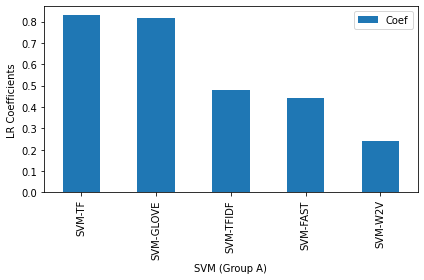

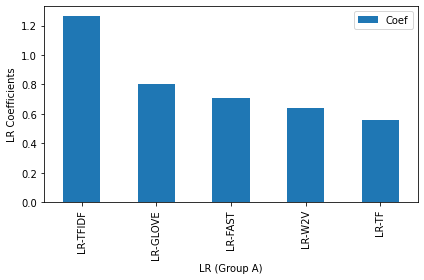

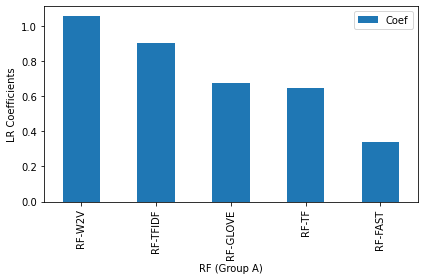

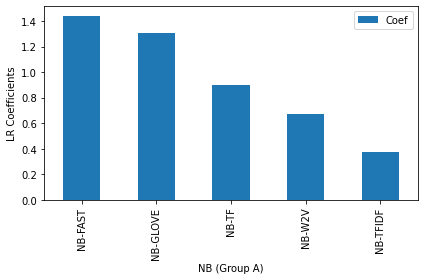

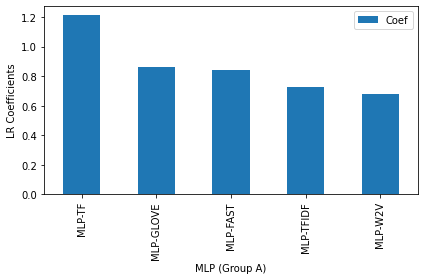

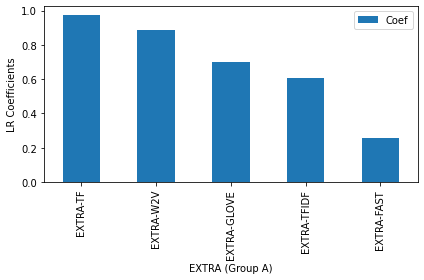

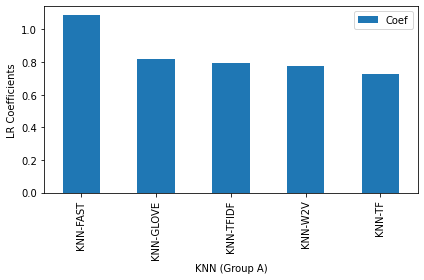

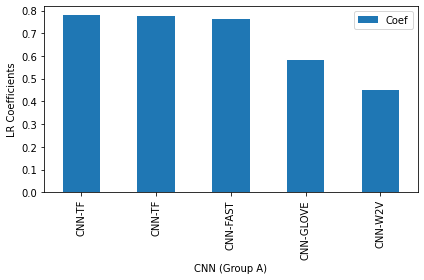

In [37]:
for idx_alg, algorithm in enumerate(algorithms_list):
    X_val, X_test, cols = filter_df_train_test(probas_val, probas_test, algorithm)
    X_val, X_test = filter_collinearity(X_val, X_test)
    stacking.fit(X_val, labels_val)
    y_pred = stacking.predict(X_test)
    score = f1_score(labels_test, y_pred)
    results_A[idx_alg] = score
    name = "Confusion Matrix "+algorithm+" (Group A)"
    
    feature_names = organize_names_df(cols)
    create_coefficient_plot(stacking.coef_, feature_names, algorithm+" (Group A)", "Coefficients Group A - "+algorithm)
#    generate_confusion_matrix(stacking, X_test, labels_test, name)

In [38]:
results_A

array([0.47460757, 0.47026532, 0.46788991, 0.45366284, 0.45863309,
       0.47472924, 0.44622222, 0.48510638])

Stacking group B - Varying Feature Representation methods

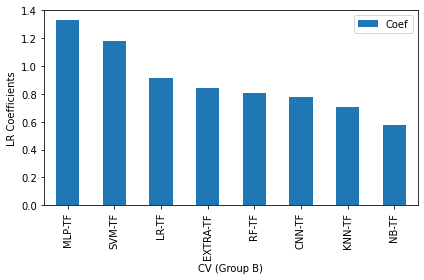

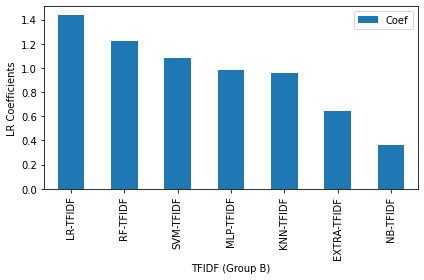

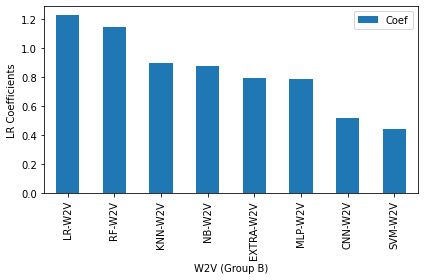

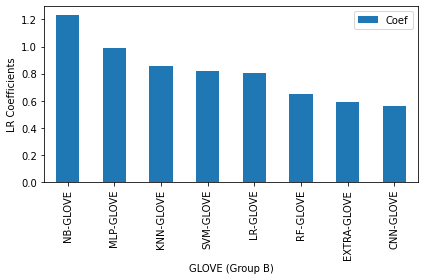

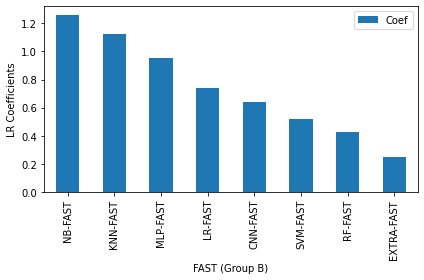

In [39]:
fe_list = ['CV', 'TFIDF', 'W2V', 'GLOVE', 'FAST']
stacking = LogisticRegression(class_weight='balanced')

results_B = np.zeros(len(fe_list))
for idx_alg, fe in enumerate(fe_list):
    X_val, X_test, cols = filter_df_train_test(probas_val, probas_test, fe)
    X_val, X_test = filter_collinearity(X_val, X_test)
    stacking.fit(X_val, labels_val)
    y_pred = stacking.predict(X_test)
    results_B[idx_alg] = f1_score(labels_test, y_pred)
    # hack for mismatched name.
    if fe == 'CV':
        name = "Confusion Matrix TF (Group B)"
    else:
        name = "Confusion Matrix "+fe+" (Group B)"
    feature_names = organize_names_df(cols)
    create_coefficient_plot(stacking.coef_, feature_names, fe+" (Group B)", "Coefficients Group B - "+fe)

#     generate_confusion_matrix(stacking, X_test, labels_test, name)

In [40]:
results_B

array([0.43375681, 0.45672192, 0.48299913, 0.47298494, 0.47038019])

Stacking group C - ALL techniques

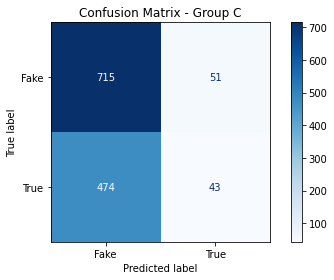

In [41]:
results_C = 0
stacking_C = LogisticRegression()
X_val, X_test = filter_collinearity(probas_val.to_numpy(), probas_test.to_numpy())
stacking_C.fit(X_val, labels_val)
y_pred = stacking_C.predict(X_test)
results_C = f1_score(labels_test, y_pred)
disp = plot_confusion_matrix(stacking_C, X_test, 
                             labels_test, cmap=plt.cm.Blues, display_labels=['Fake', 'True'])
disp.ax_.set_title("Confusion Matrix - Group C")
plt.tight_layout()
plt.savefig('confusion_matrix_GROUP_C.pdf', dpi=300)

In [42]:
print(results_C)

0.14075286415711946


In [43]:
results_C

0.14075286415711946

In [44]:
stacking_C.coef_

array([[ 0.28709755,  0.10307008, -0.62257496, -0.05216775, -0.58555339,
        -0.18563887,  0.63925163,  0.08877741,  0.17945556, -0.14817066,
        -0.1090194 ,  0.3622409 , -0.18161141,  0.46780091, -0.77838567,
        -0.11678107, -0.72691935,  0.35610557, -0.26319233,  0.49322731,
         0.3327342 , -0.0829891 ,  0.22594573, -0.2382079 ,  0.26550855,
         0.11690383, -0.422147  , -0.3173005 ,  0.10481937, -1.24996697,
        -0.29799413, -0.00309787, -0.13148302, -0.10242339,  0.19287353,
        -0.09613656, -0.05173863, -0.45707671, -0.41698308, -0.03154139]])


Stacking group D - Proposed Selection scheme

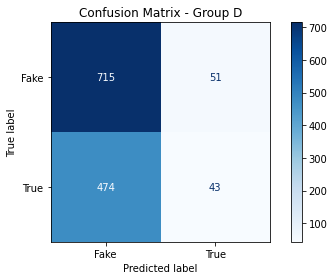

In [46]:
models_D = ['RF-TFIDF','SVM-CV','LR-GLOVE','RF-W2V','MLP-W2V','CNN-GLOVE','CNN-FAST','NB-TFIDF','EXTRA-TFIDF','NB-FAST','SVM-TFIDF']
names = 'RF-TFIDF|SVM-CV|LR-GLOVE|RF-W2V|MLP-W2|CNN-GLOVE|CNN-FAST|NB-TFIDF|EXTRA-TFIDF|NB-FAST|SVM-TFIDF|'

X_val, X_test, cols = filter_df_train_test(probas_val, probas_test, names)
X_val, X_test = filter_collinearity(X_val, X_test)
stacking_D = LogisticRegression()

stacking_D.fit(X_val, labels_val)
y_pred = stacking_D.predict(X_test)
results_D = f1_score(labels_test, y_pred)
disp=plot_confusion_matrix(stacking_D, X_test, labels_test, cmap=plt.cm.Blues,
                           display_labels=['Fake', 'True'])
disp.ax_.set_title("Confusion Matrix - Group D")
plt.tight_layout()
plt.savefig('confusion_matrix_GroupD.pdf', dpi=300)

In [47]:
print(results_D)

0.14075286415711946


In [48]:
stacking_D.coef_

array([[ 0.28709755,  0.10307008, -0.62257496, -0.05216775, -0.58555339,
        -0.18563887,  0.63925163,  0.08877741,  0.17945556, -0.14817066,
        -0.1090194 ,  0.3622409 , -0.18161141,  0.46780091, -0.77838567,
        -0.11678107, -0.72691935,  0.35610557, -0.26319233,  0.49322731,
         0.3327342 , -0.0829891 ,  0.22594573, -0.2382079 ,  0.26550855,
         0.11690383, -0.422147  , -0.3173005 ,  0.10481937, -1.24996697,
        -0.29799413, -0.00309787, -0.13148302, -0.10242339,  0.19287353,
        -0.09613656, -0.05173863, -0.45707671, -0.41698308, -0.03154139]])

Analyzing coefficients

In [49]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

Coefficients for group D

In [50]:
models_D=[
          'SVM-CV', 'SVM-TFIDF', 'SVM-W2V', 'SVM-GLOVE', 'SVM-FAST',
          'KNN-CV', 'KNN-TFIDF','KNN-W2V', 'KNN-GLOVE', 'KNN-FAST',
          'MLP-CV','MLP-TFIDF','MLP-W2V','MLP-GLOVE','MLP-FAST',
          'NB-CV','NB-TFIDF','NB-W2V','NB-GLOVE','NB-FAST',
          'RF-CV','RF-TFIDF','RF-W2V','RF-GLOVE','RF-FAST',
          'LR-CV','LR-TFIDF','LR-W2V','LR-GLOVE','LR-FAST',
          'CNN-CV','CNN-TFIDF','CNN-W2V','CNN-GLOVE','CNN-FAST',
          'EXTRA-CV', 'EXTRA-TFIDF','EXTRA-W2V', 'EXTRA-GLOVE', 'EXTRA-FAST',]
odds_D = np.exp(stacking_D.coef_.T)
odds_D = pd.DataFrame(odds_D,models_D,['Coef']).sort_values(by='Coef', ascending=False)
odds_D.round(3)

,Coef
KNN-TFIDF,1.895
NB-FAST,1.638
MLP-GLOVE,1.596
MLP-TFIDF,1.437
NB-W2V,1.428
RF-CV,1.395
SVM-CV,1.333
RF-FAST,1.304
RF-W2V,1.254
CNN-FAST,1.213


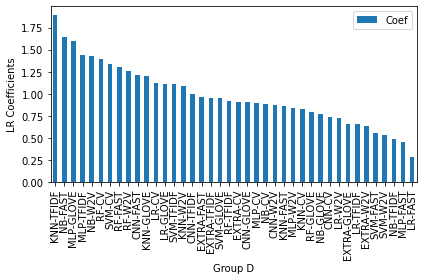

In [51]:
create_coefficient_plot(stacking_D.coef_, models_D, 'Group D', 'testi')

#### Oracle

In [28]:
dataset_name = 'liar'
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

def load_predictions(dataset_name):
    path =  '/content/Data/liar' + '/pred_val' + '.csv'
    table_pred = pd.read_csv(path)
    label = table_pred['label']
    methods = table_pred.drop('label', axis=1)
    methods = methods.drop('Unnamed: 0', axis=1)
    return label, methods

In [29]:
label, methods = load_predictions(dataset_name)

In [30]:
def get_oracle(labels, pred={}, clfs=[]):
    cont = 0;
    list_yes = np.zeros((len(labels)))
    oracle_preds = np.zeros((len(labels)))
    for i, k in enumerate(labels):
        acertou = False
        for clf in clfs:
            if pred[clf][i] == k:
                acertou = True
                oracle_preds[i] = pred[clf][i]
                break
        if acertou:
            cont += 1
            list_yes[i] = k
        else:
            oracle_preds[i] = pred[clf][0]
            if k == 0:
                list_yes[i] = 1
            else:
                list_yes[i] = 0
    return cont, list_yes, oracle_preds

In [31]:
print(len(label.to_numpy()),label.shape, methods.shape)

1284 (1284,) (1284, 40)


In [52]:
clfs = ['SVM-CV', 'SVM-TFIDF', 'SVM-W2V', 'SVM-GLOVE', 'SVM-FAST', 'SVM-BERT',
        'KNN-CV', 'KNN-TFIDF','KNN-W2V', 'KNN-GLOVE', 'KNN-FAST', 'KNN-BERT',
        'MLP-CV','MLP-TFIDF','MLP-W2V','MLP-GLOVE','MLP-FAST','MLP-BERT',
        'NB-CV','NB-TFIDF','NB-W2V','NB-GLOVE','NB-FAST','NB-BERT',
        'RF-CV','RF-TFIDF','RF-W2V','RF-GLOVE','RF-FAST','RF-BERT',
        'LR-CV','LR-TFIDF','LR-W2V','LR-GLOVE','LR-FAST','LR-BERT',
        'CNN-CV','CNN-TFIDF','CNN-W2V','CNN-GLOVE','CNN-FAST','CNN-BERT']
names = {}
dataset_name='liar'
names['liar'] = ['RF-TFIDF','SVM-CV','LR-GLOVE','RF-W2V','MLP-W2V','CNN-GLOVE','CNN-FAST','NB-TFIDF','EXTRA-TFIDF','NB-FAST','LR-CV']
#['MLP-FAST','KNN-GLOVE','KNN-FAST','KNN-CV','MLP-W2V','NB-CV','NB-FAST','RF-CV','LR-CV','KNN-W2V']

oracle, df_yes, oracle_preds = get_oracle(label.to_numpy(), methods, names[dataset_name])
print(oracle)

1173


ORacle groups B

In [53]:
names = {}
names['fast'] = ['MLP-FAST','KNN-FAST','EXTRA-FAST','RF-FAST','SVM-FAST','LR-FAST','NB-FAST','CNN-FAST']
names['glove'] = ['MLP-GLOVE','KNN-GLOVE','EXTRA-GLOVE','RF-GLOVE','SVM-GLOVE','LR-GLOVE','NB-GLOVE','CNN-GLOVE']
names['cv'] = ['MLP-CV','KNN-CV','EXTRA-CV','RF-CV','SVM-CV','LR-CV','NB-CV','CNN-CV']
names['tfidf'] = ['MLP-TFIDF','KNN-TFIDF','EXTRA-TFIDF','RF-TFIDF','SVM-TFIDF','LR-TFIDF','NB-TFIDF','CNN-TFIDF']
names['w2v'] = ['MLP-W2V','KNN-W2V','EXTRA-W2V','RF-W2V','SVM-W2V','LR-W2V','NB-W2V','NB-W2V']
                
for name in ['fast', 'glove', 'cv', 'tfidf', 'w2v']:
    oracle, df_yes, oracle_preds = get_oracle(label.to_numpy(), methods, names[name])
    print(f"{name}: {oracle}")
    score = f1_score(label.to_numpy(), oracle_preds, average='macro')
    print(f"{name} f1score: {score}")

fast: 1110
fast f1score: 0.8487632508833922
glove: 1040
glove f1score: 0.7784954751131222
cv: 1207
cv f1score: 0.9919536570753925
tfidf: 1133
tfidf f1score: 0.9919536570753925
w2v: 1131
w2v f1score: 0.868524240617264


In [54]:
methods

,SVM-CV,SVM-TFIDF,SVM-W2V,SVM-GLOVE,SVM-FAST,LR-CV,LR-TFIDF,LR-GLOVE,LR-W2V,LR-FAST,RF-CV,RF-TFIDF,RF-GLOVE,RF-W2V,RF-FAST,NB-CV,NB-TFIDF,NB-GLOVE,NB-W2V,NB-FAST,MLP-CV,MLP-TFIDF,MLP-GLOVE,MLP-W2V,MLP-FAST,EXTRA-CV,EXTRA-TFIDF,EXTRA-GLOVE,EXTRA-W2V,EXTRA-FAST,KNN-CV,KNN-TFIDF,KNN-GLOVE,KNN-W2V,KNN-FAST,CNN-CV,CNN-TFIDF,CNN-W2V,CNN-GLOVE,CNN-FAST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0
2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0
4,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1281,1,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0
1282,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0


In [55]:
from sklearn.preprocessing import Normalizer

In [56]:
norm = Normalizer()
from sklearn.datasets import make_classification
X, y = make_classification()
X_norm = norm.fit_transform(X)

In [57]:
X_norm

array([[-0.20927869,  0.33192379,  0.2155039 , ...,  0.1668317 ,
        -0.21837744, -0.00092848],
       [ 0.19439195,  0.20458008,  0.19764289, ...,  0.32799384,
        -0.27362918, -0.23942321],
       [-0.24891464,  0.14058906,  0.1360289 , ...,  0.2223065 ,
         0.12790753,  0.19284231],
       ...,
       [ 0.12017227,  0.35028607, -0.04703532, ..., -0.54312982,
         0.16667961, -0.12265067],
       [-0.12699103,  0.01076257,  0.00448187, ..., -0.14336915,
        -0.34894353, -0.74989669],
       [ 0.17320828, -0.0443444 , -0.0205973 , ...,  0.31959581,
        -0.10853455, -0.40171363]])

## PARTE III

### Diversity Analysis 

In [21]:
!pip install deslib
!pip install umap
!pip install umap-learn
import pandas as pd
import numpy as np
from sklearn.manifold import MDS, TSNE
from deslib.util.diversity import double_fault
import matplotlib.lines as mlines
!pip install 'umap-learn==0.3.10'

     |████████████████████████████████| 158 kB 24.6 MB/s 
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=eda47baffa6680b7237bfb671f138f5b348d6ae33e4c4d2b1c51f393a1f90e68
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 22.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=a3f02101385d7fd2dcdd37bc3cc5e6c844238925610ad016661de26a90d7f0b8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=be73af5bdfc6f7dcee13f5b7d458d25e7476a8b23e188b40a813d3de549451a0
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built u

In [23]:
from umap.umap_ import UMAP

In [24]:
def compute_pairwise_diversity_matrix(targets, prediction_matrix, diversity_func):
    """Computes the pairwise diversity matrix.

     Parameters
     ----------
     targets : array of shape (n_samples):
        Class labels of each sample in X.

     prediction_matrix : array of shape (n_samples, n_classifiers):
        Predicted class labels for each classifier in the pool

     diversity_func : Function
        Function used to estimate the pairwise diversity

     Returns
     -------
     diversity : array of shape = [n_classifiers]
        The average pairwise diversity matrix calculated for the pool of
        classifiers

     """
    n_classifiers = prediction_matrix.shape[1]
    diversity = np.zeros((n_classifiers, n_classifiers))
    for clf_index in range(n_classifiers):
        for clf_index2 in range(clf_index + 1, n_classifiers):
            this_diversity = diversity_func(targets,
                                            prediction_matrix[:, clf_index],
                                            prediction_matrix[:, clf_index2])

            diversity[clf_index, clf_index2] = this_diversity
            diversity[clf_index2, clf_index] = this_diversity

    return diversity

In [25]:
def load_predictions(dataset_name):
    path = '/content/Data/liar/pred_val.csv'
    table_pred = pd.read_csv(path)
    print(dataset_name)
    if dataset_name == 'liar':
        label = table_pred["label"]
        methods = table_pred.drop('label', axis=1)
    methods = methods.drop('Unnamed: 0', axis=1)
    return label, methods

def load_predictions_fold(dataset_name, partition, fold_number=1):
    path = '/content/Data/liar/pred_'+partition+'.csv'
    table_pred = pd.read_csv(path)
    if dataset_name.lower() == 'liar':
        label = table_pred['label']
        preds = table_pred.drop('label', axis=1)
    preds = preds.drop('Unnamed: 0', axis=1)
    return label, preds

def compute_matrix_embedding(dataset_name, n_classifiers, n_features, method='mds', n_neighbors=5, min_dist=0.7
):
    D = compute_pairwise_diversity_matrix(label.to_numpy(), methods.to_numpy(), double_fault)
    D = 1/D
    D[D==np.inf] = 0
    if method == 'mds':
        method = MDS(dissimilarity='precomputed', random_state=123456987, n_init=20, max_iter=100000)
    elif method == 'tsne':
        method = TSNE(perplexity=25, init='pca', random_state=42, early_exaggeration=50, 
                      learning_rate=200, n_iter=2500, angle=0.5)
    else:        
        method = UMAP(n_neighbors=2, metric='euclidean', random_state=123456987, min_dist=0.7, n_components=2,)
    D_tilde = method.fit_transform(D)
    D_tilde = D_tilde.reshape(n_classifiers, n_features, 2)
    return D_tilde

In [26]:
from matplotlib import pyplot as plt
def plot_diversity(D_changed, method_tmp, dataset_name, title):
    s = 100
    colors = {}
    colors[0] = '#DAA520'
    colors[1] = '#FF0000'
    colors[2] = '#0000FF'
    colors[3] = '#228B22'
    colors[4] = '#000000'
    markers = {}
    markers[0] = 'X'
    markers[1] = 'd'
    markers[2] = '*'
    markers[3] = "^"
    markers[4] = 'o'
    n_classifiers, n_features, _ = D_changed.shape
    plt.figure(figsize=(15,10))
    method=0
    for idx in range(n_classifiers):
        for idx2 in range(n_features):
            x, y = D_changed[idx,idx2, 0], D_changed[idx,idx2, 1]
            plt.scatter(x, y, color=colors[idx2], s=s, lw=0, marker=markers[idx2])
            plt.annotate(method_tmp[method], xy=(x, y), textcoords='offset points', xytext=(5, 15), ha='right', va='top')  
            method += 1
    
    m1 = mlines.Line2D([], [], color=colors[0], marker=markers[0], linestyle='None', markersize=10, label='CV')
    m2 = mlines.Line2D([], [], color=colors[1], marker=markers[1], linestyle='None', markersize=10, label='TFIDF')
    m3 = mlines.Line2D([], [], color=colors[2], marker=markers[2], linestyle='None', markersize=10, label='Glove')
    m4 = mlines.Line2D([], [], color=colors[3], marker=markers[3], linestyle='None', markersize=10, label='Word2Vec')
    m5 = mlines.Line2D([], [], color=colors[4], marker=markers[4], linestyle='None', markersize=10, label='FastText')
    plt.title('CPS ' + dataset_name.upper()+' dataset')
    plt.legend(handles=[m1, m2, m3, m4, m5])
    plt.tight_layout()
    plt.savefig(title + "_" + dataset_name.upper()+'_dataset.pdf', dpi=450)

liar


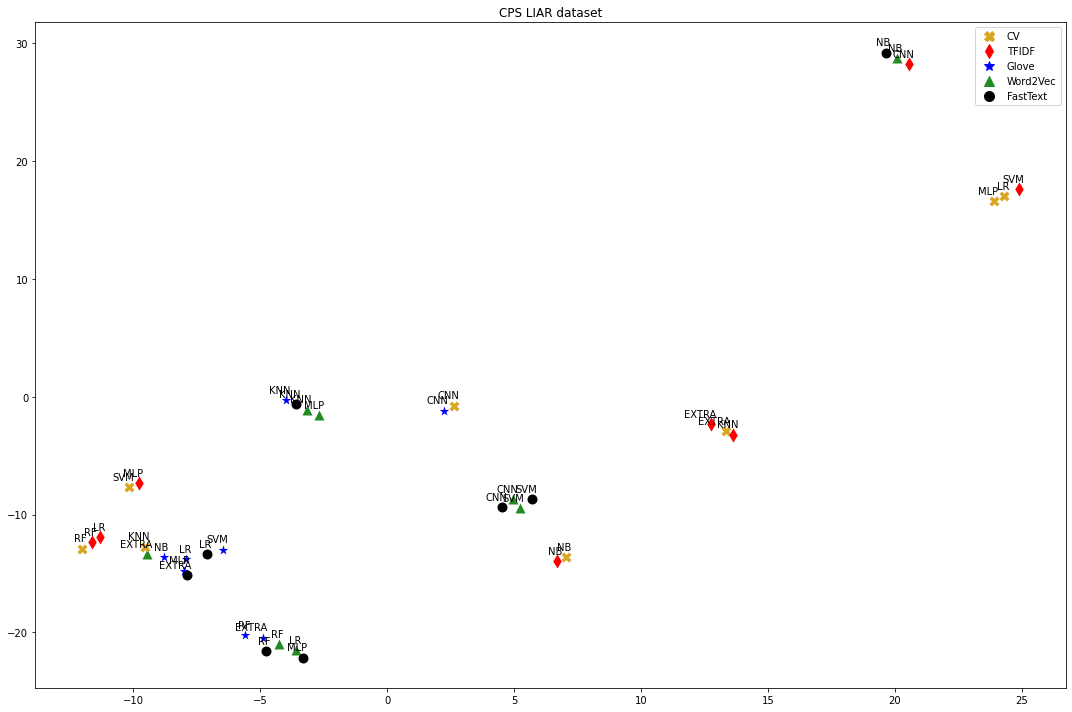

In [27]:
n_classifiers = 8
method = 'umap'
n_features = 5
for dataset_name in ['liar']:
    
    label, methods = load_predictions(dataset_name)
    methods_name = [name.split('-', 1)[0] for name in methods.columns]
    D_tilde = compute_matrix_embedding(dataset_name, n_classifiers, n_features, method)
    plot_diversity(D_tilde, methods_name, dataset_name, method)